In [1]:
!pip3 install seaborn

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import cv2

from glob import glob


In [3]:
fpath = glob('../crop_data/female/*.jpg')
mpath = glob('../crop_data/male/*.jpg')

In [4]:
df_female = pd.DataFrame(fpath, columns=['filepath'])
df_female['gender'] = 'female'

df_male = pd.DataFrame(mpath, columns=['filepath'])
df_male['gender'] = 'male'

df = pd.concat((df_female,df_male),axis=0)

df.head()



,filepath,gender
0,../crop_data/female/female_2.jpg,female
1,../crop_data/female/female_3933.jpg,female
2,../crop_data/female/female_4084.jpg,female
3,../crop_data/female/female_98.jpg,female
4,../crop_data/female/female_1842.jpg,female


In [5]:
df.tail()

,filepath,gender
2796,../crop_data/male/male_4748.jpg,male
2797,../crop_data/male/male_1156.jpg,male
2798,../crop_data/male/male_1142.jpg,male
2799,../crop_data/male/male_622.jpg,male
2800,../crop_data/male/male_3033.jpg,male


In [6]:
df.shape

(6295, 2)

In [7]:
# return width imagenya
def get_size(path):
    img = cv2.imread(path)
    return img.shape[0]

In [8]:
df['dimension'] = df['filepath'].apply(get_size)

In [9]:
df.head()

,filepath,gender,dimension
0,../crop_data/female/female_2.jpg,female,101
1,../crop_data/female/female_3933.jpg,female,132
2,../crop_data/female/female_4084.jpg,female,173
3,../crop_data/female/female_98.jpg,female,236
4,../crop_data/female/female_1842.jpg,female,60


In [10]:
dist_gender =  df['gender'].value_counts()
dist_gender

gender
female    3494
male      2801
Name: count, dtype: int64

<Axes: ylabel='count'>

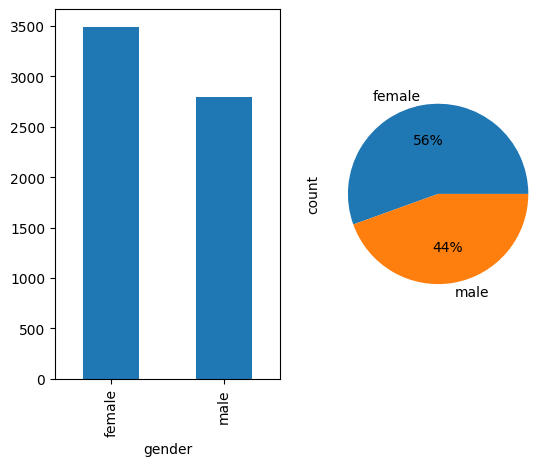

In [11]:
fig,ax =  plt.subplots(nrows=1,ncols=2)
dist_gender.plot(kind='bar', ax=ax[0])
dist_gender.plot(kind='pie', ax=ax[1],autopct='%0.0f%%')


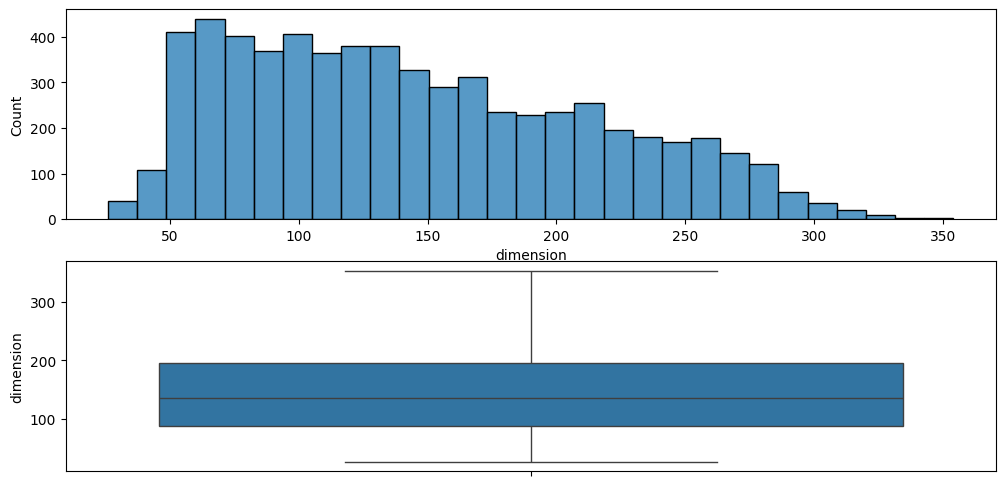

In [12]:
# histrogram 
# tambah box plot
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
sns.histplot(df['dimension'])
plt.subplot(2,1,2)
sns.boxplot(df['dimension'])
plt.show()

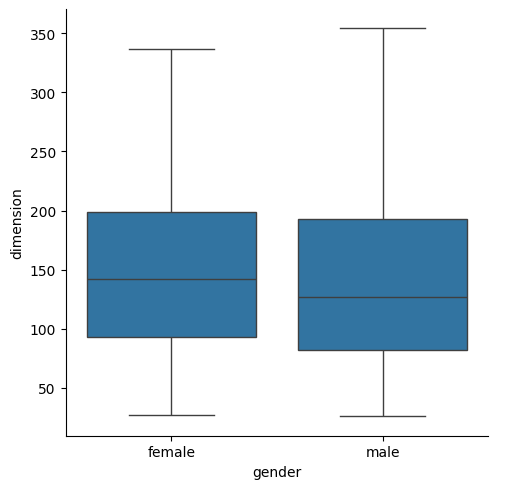

In [13]:
sns.catplot(data=df,x='gender',y='dimension',kind='box')

In [14]:
df_filter = df.query('dimension > 60')


In [15]:
df_filter.shape

(5700, 3)

In [16]:
df_filter['gender'].value_counts(normalize=True)

gender
female    0.56193
male      0.43807
Name: proportion, dtype: float64

In [17]:
def structuring(path):
    try:
        img = cv2.imread(path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        size = gray.shape[0]
        if size >= 100:
            gray_resize = cv2.resize(gray,(100,100),cv2.INTER_AREA)
        else:
            gray_resize = cv2.resize(gray,(100,100),cv2.INTER_CUBIC)
        flattern_image = gray_resize.flatten()
        return flattern_image
    except:
        return None 

In [19]:
df_filter['data'] = df_filter['filepath'].apply(structuring)

/var/folders/92/rb5cwqlj3jq8gzl6rvnj5mgw0000gn/T/ipykernel_4554/3317895246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['data'] = df_filter['filepath'].apply(structuring)
